<h1>Predict Customer Spending Score</h1>
<h3>-> Low: 0, Average: 1, High: 2</h3>

In [47]:
### Data Preprocessing
import pandas as pd

# Combine CSVs
csv1 = pd.read_csv("Test.csv")
csv2 = pd.read_csv("Customers.csv")

dataframe = pd.concat( [csv1, csv2], ignore_index = True )
dataframe = dataframe.drop(["ID", "Segmentation", "Var_1"] , axis = 1)
dataframe

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,Female,Yes,69,No,NaN,0.0,Low,1.0
3,Male,Yes,59,No,Executive,11.0,High,2.0
4,Female,No,19,No,Marketing,NaN,Low,4.0
...,...,...,...,...,...,...,...,...
10690,Male,No,22,No,NaN,0.0,Low,7.0
10691,Male,No,35,No,Executive,3.0,Low,4.0
10692,Female,No,33,Yes,Healthcare,1.0,Low,1.0
10693,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [48]:
# Fill na with mode 
ever_married_mode = dataframe['Ever_Married'].mode()[0]
dataframe['Ever_Married'] = dataframe['Ever_Married'].fillna(ever_married_mode)

graduated_mode = dataframe['Graduated'].mode()[0]
dataframe['Graduated'] = dataframe['Graduated'].fillna(graduated_mode)

Profession_mode = dataframe['Profession'].mode()[0]
dataframe['Profession'] = dataframe['Profession'].fillna(Profession_mode)

# Fill na with mean
Work_Experience_mean = int(dataframe['Work_Experience'].mean())
dataframe['Work_Experience'] = dataframe['Work_Experience'].fillna(Work_Experience_mean)

Family_Size_mean = int(dataframe['Family_Size'].mean())
dataframe['Family_Size'] = dataframe['Family_Size'].fillna(Family_Size_mean)

# encode categorical data
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})
dataframe['Ever_Married'] = dataframe['Ever_Married'].map({'Yes': 1, 'No': 0})
dataframe['Graduated'] = dataframe['Graduated'].map({'Yes': 1, 'No': 0})
dataframe['Spending_Score'] = dataframe['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})

# One Hot Encoding
profession_dummies = pd.get_dummies(dataframe['Profession'], prefix='Profession', prefix_sep='=>', dtype=int)
dataframe = pd.concat([dataframe, profession_dummies], axis = 1)
dataframe = dataframe.drop('Profession', axis = 1)

dataframe

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession=>Artist,Profession=>Doctor,Profession=>Engineer,Profession=>Entertainment,Profession=>Executive,Profession=>Healthcare,Profession=>Homemaker,Profession=>Lawyer,Profession=>Marketing
0,0,1,36,1,0.0,0,1.0,0,0,1,0,0,0,0,0,0
1,1,1,37,1,8.0,1,4.0,0,0,0,0,0,1,0,0,0
2,0,1,69,0,0.0,0,1.0,1,0,0,0,0,0,0,0,0
3,1,1,59,0,11.0,2,2.0,0,0,0,0,1,0,0,0,0
4,0,0,19,0,2.0,0,4.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,1,0,22,0,0.0,0,7.0,1,0,0,0,0,0,0,0,0
10691,1,0,35,0,3.0,0,4.0,0,0,0,0,1,0,0,0,0
10692,0,0,33,1,1.0,0,1.0,0,0,0,0,0,1,0,0,0
10693,0,0,27,1,1.0,0,4.0,0,0,0,0,0,1,0,0,0


In [49]:
# Separate data
features = dataframe.drop('Spending_Score', axis = 1)
label = dataframe['Spending_Score']

# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features.values, label.values, test_size = 0.3)

# Apply Feature Scaling
from sklearn.preprocessing import StandardScaler
training_scaler = StandardScaler()
testing_scaler = StandardScaler()

X_train = training_scaler.fit_transform(X_train)
X_test = testing_scaler.fit_transform(X_test)

In [50]:
### K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier( n_neighbors = 100)
knn.fit(X_train, y_train)
KNN_prediction = knn.predict(X_test)
KNN_score = accuracy_score(y_test, KNN_prediction)

### Build Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
logistic_prediction = logistic_classifier.predict(X_test)
logistic_score = accuracy_score(y_test, logistic_prediction)

### Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predication = tree.predict(X_test)
tree_score = accuracy_score(y_test, tree_predication)

### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 )
forest.fit(X_train, y_train)
forest_prediction = forest.predict(X_test)
forest_score = accuracy_score(y_test, forest_prediction)

### Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_prediction)

### Kernel Support Vector Machine
kernel_svc = SVC(kernel = "rbf")
kernel_svc.fit(X_train, y_train)
kernel_svc_prediction = kernel_svc.predict(X_test)
kernel_svc_score = accuracy_score(y_test, kernel_svc_prediction)

### Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_prediction = bayes.predict(X_test)
bayes_score = accuracy_score(y_test, bayes_prediction)

In [51]:
# Model Evaluation
print(f"K-Nearest Neighbors Score: {KNN_score:.4}")
print(f"Logistic Regression Score: {logistic_score:.4}")
print(f"Decision Tree Score: {tree_score:.4}")
print(f"Random Forest Score: {forest_score:.4}")
print(f"Support Vector Machine Score: {svc_score:.4}")
print(f"Kernel Support Vector Machine Score: {kernel_svc_score:.4}")
print(f"Bayes Model Score: {bayes_score:.4}")

K-Nearest Neighbors Score: 0.7753
Logistic Regression Score: 0.7875
Decision Tree Score: 0.7597
Random Forest Score: 0.7834
Support Vector Machine Score: 0.7809
Kernel Support Vector Machine Score: 0.8068
Bayes Model Score: 0.5989


<Axes: title={'center': 'Feature Importance'}>

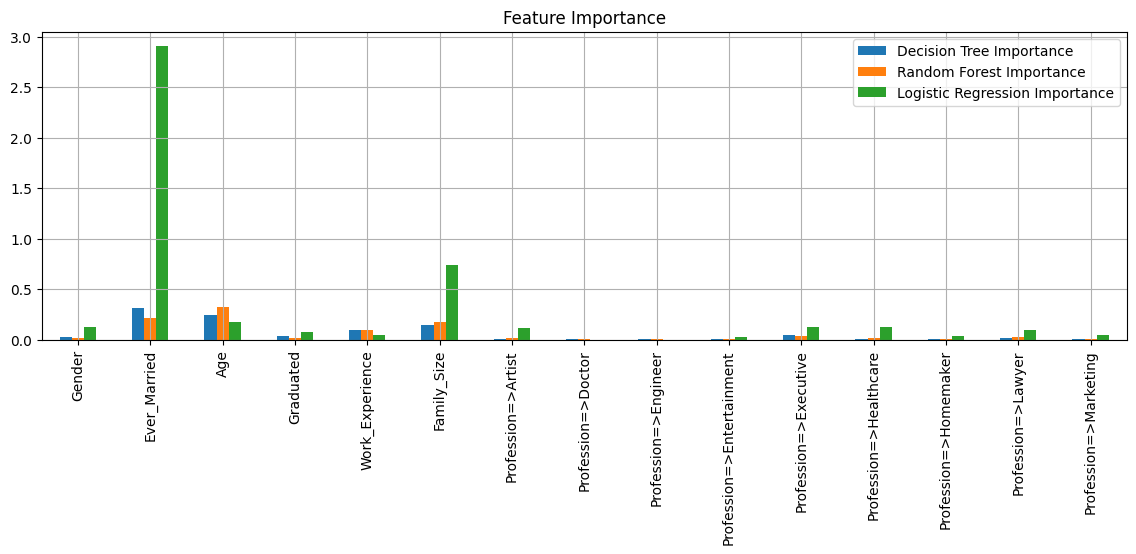

In [52]:
# Feature Importance
feature_importance = pd.DataFrame({
  'Decision Tree Importance': tree.feature_importances_, 
  'Random Forest Importance': forest.feature_importances_,
  'Logistic Regression Importance': abs(logistic_classifier.coef_[0]),
  }, index=features.columns)

feature_importance.plot(kind='bar', rot=90, figsize=(14,4), title='Feature Importance', grid=True)